# Import Libraries

In [1]:
import gdown
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

# set the max-size of the colums to display in output
pd.set_option('max_column', 30)

# plot figure size
plt.rcParams['figure.figsize'] = [12,6]

## Load Data

In [2]:
# Download data

url = 'https://drive.google.com/uc?id=1bWLqwXLmR-R-og9KlTmbxZllDTN4qCNC'
output = 'propulsion.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1bWLqwXLmR-R-og9KlTmbxZllDTN4qCNC
To: G:\Deep-Learning\NLP_Task\mechademy\propulsion.csv
100%|█████████████████████████████████████████████████████████████████████████████| 1.30M/1.30M [00:00<00:00, 1.32MB/s]


'propulsion.csv'

In [3]:
propulsion_df = pd.read_csv('propulsion.csv')

In [4]:
# show first five rows

propulsion_df.head()

,Unnamed: 0,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980


In [5]:
# shape of  df 

propulsion_df.shape

(10000, 19)

In [6]:
# drop usless column

propulsion_df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
# rename columns

propulsion_df.columns = [cols.split('(')[0].strip().replace(' ','_').lower() for cols in propulsion_df.columns ]

# rename target columns
propulsion_df = propulsion_df.rename(columns={'gt_compressor_decay_state_coefficient.': 'target_1', 'gt_turbine_decay_state_coefficient.': 'target_2'})

In [8]:
propulsion_df.head()

,lever_position,ship_speed,gas_turbine_shaft_torque,gas_turbine_rate_of_revolutions,gas_generator_rate_of_revolutions,starboard_propeller_torque,port_propeller_torque,hp_turbine_exit_temperature,gt_compressor_inlet_air_temperature,gt_compressor_outlet_air_temperature,hp_turbine_exit_pressure,gt_compressor_inlet_air_pressure,gt_compressor_outlet_air_pressure,gas_turbine_exhaust_gas_pressure,turbine_injecton_control,fuel_flow,target_1,target_2
0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980


In [9]:
# print descriptive statistic on numerical columns

propulsion_df.describe()

,lever_position,ship_speed,gas_turbine_shaft_torque,gas_turbine_rate_of_revolutions,gas_generator_rate_of_revolutions,starboard_propeller_torque,port_propeller_torque,hp_turbine_exit_temperature,gt_compressor_inlet_air_temperature,gt_compressor_outlet_air_temperature,hp_turbine_exit_pressure,gt_compressor_inlet_air_pressure,gt_compressor_outlet_air_pressure,gas_turbine_exhaust_gas_pressure,turbine_injecton_control,fuel_flow,target_1,target_2
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.150075,14.951400,27100.647714,2131.151788,8194.182366,225.957785,225.957785,734.476178,288.0,645.748980,2.345732,9.980000e-01,12.262597,1.029402,33.480715,0.659100,0.975021,0.987455
std,2.624015,7.740467,22062.780307,772.211732,1090.569425,199.737886,199.737886,173.009157,0.0,72.483036,1.081038,2.236101e-13,5.320817,0.010353,25.721725,0.504791,0.014734,0.007510
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,444.731000,288.0,540.999000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.950000,0.975000
25%,3.144000,9.000000,8375.791500,1386.758000,7056.520500,60.317000,60.317000,589.841000,288.0,577.980750,1.389000,9.980000e-01,7.445000,1.020000,13.534000,0.246000,0.962000,0.981000
50%,5.140000,15.000000,21630.133500,1924.325000,8480.527000,175.264000,175.264000,705.351000,288.0,636.800000,2.082000,9.980000e-01,11.086000,1.026000,25.249500,0.496000,0.975000,0.987000
75%,7.148000,21.000000,39000.710250,2678.078000,9132.132500,332.360000,332.360000,833.154750,288.0,693.656750,2.981000,9.980000e-01,15.649000,1.036000,44.500000,0.881000,0.988000,0.994000
max,9.300000,27.000000,72783.338000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.000000,1.000000


Observations:
- min value of gas_turbine_shaft_torque is 253 and max value is 271000 and mean is 27100, show there is an outlier
- we nedd to scale down the value in gt_compressor_outlet_air_temperature because there is lot of vaariation

In [10]:
# print some few imformation about database 

propulsion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
lever_position                          10000 non-null float64
ship_speed                              10000 non-null float64
gas_turbine_shaft_torque                10000 non-null float64
gas_turbine_rate_of_revolutions         10000 non-null float64
gas_generator_rate_of_revolutions       10000 non-null float64
starboard_propeller_torque              10000 non-null float64
port_propeller_torque                   10000 non-null float64
hp_turbine_exit_temperature             10000 non-null float64
gt_compressor_inlet_air_temperature     10000 non-null float64
gt_compressor_outlet_air_temperature    10000 non-null float64
hp_turbine_exit_pressure                10000 non-null float64
gt_compressor_inlet_air_pressure        10000 non-null float64
gt_compressor_outlet_air_pressure       10000 non-null float64
gas_turbine_exhaust_gas_pressure        10000 non-null float64
turbine_in

## Missing Values

In [11]:
propulsion_df.isna().sum()

lever_position                          0
ship_speed                              0
gas_turbine_shaft_torque                0
gas_turbine_rate_of_revolutions         0
gas_generator_rate_of_revolutions       0
starboard_propeller_torque              0
port_propeller_torque                   0
hp_turbine_exit_temperature             0
gt_compressor_inlet_air_temperature     0
gt_compressor_outlet_air_temperature    0
hp_turbine_exit_pressure                0
gt_compressor_inlet_air_pressure        0
gt_compressor_outlet_air_pressure       0
gas_turbine_exhaust_gas_pressure        0
turbine_injecton_control                0
fuel_flow                               0
target_1                                0
target_2                                0
dtype: int64

- There are no missing values

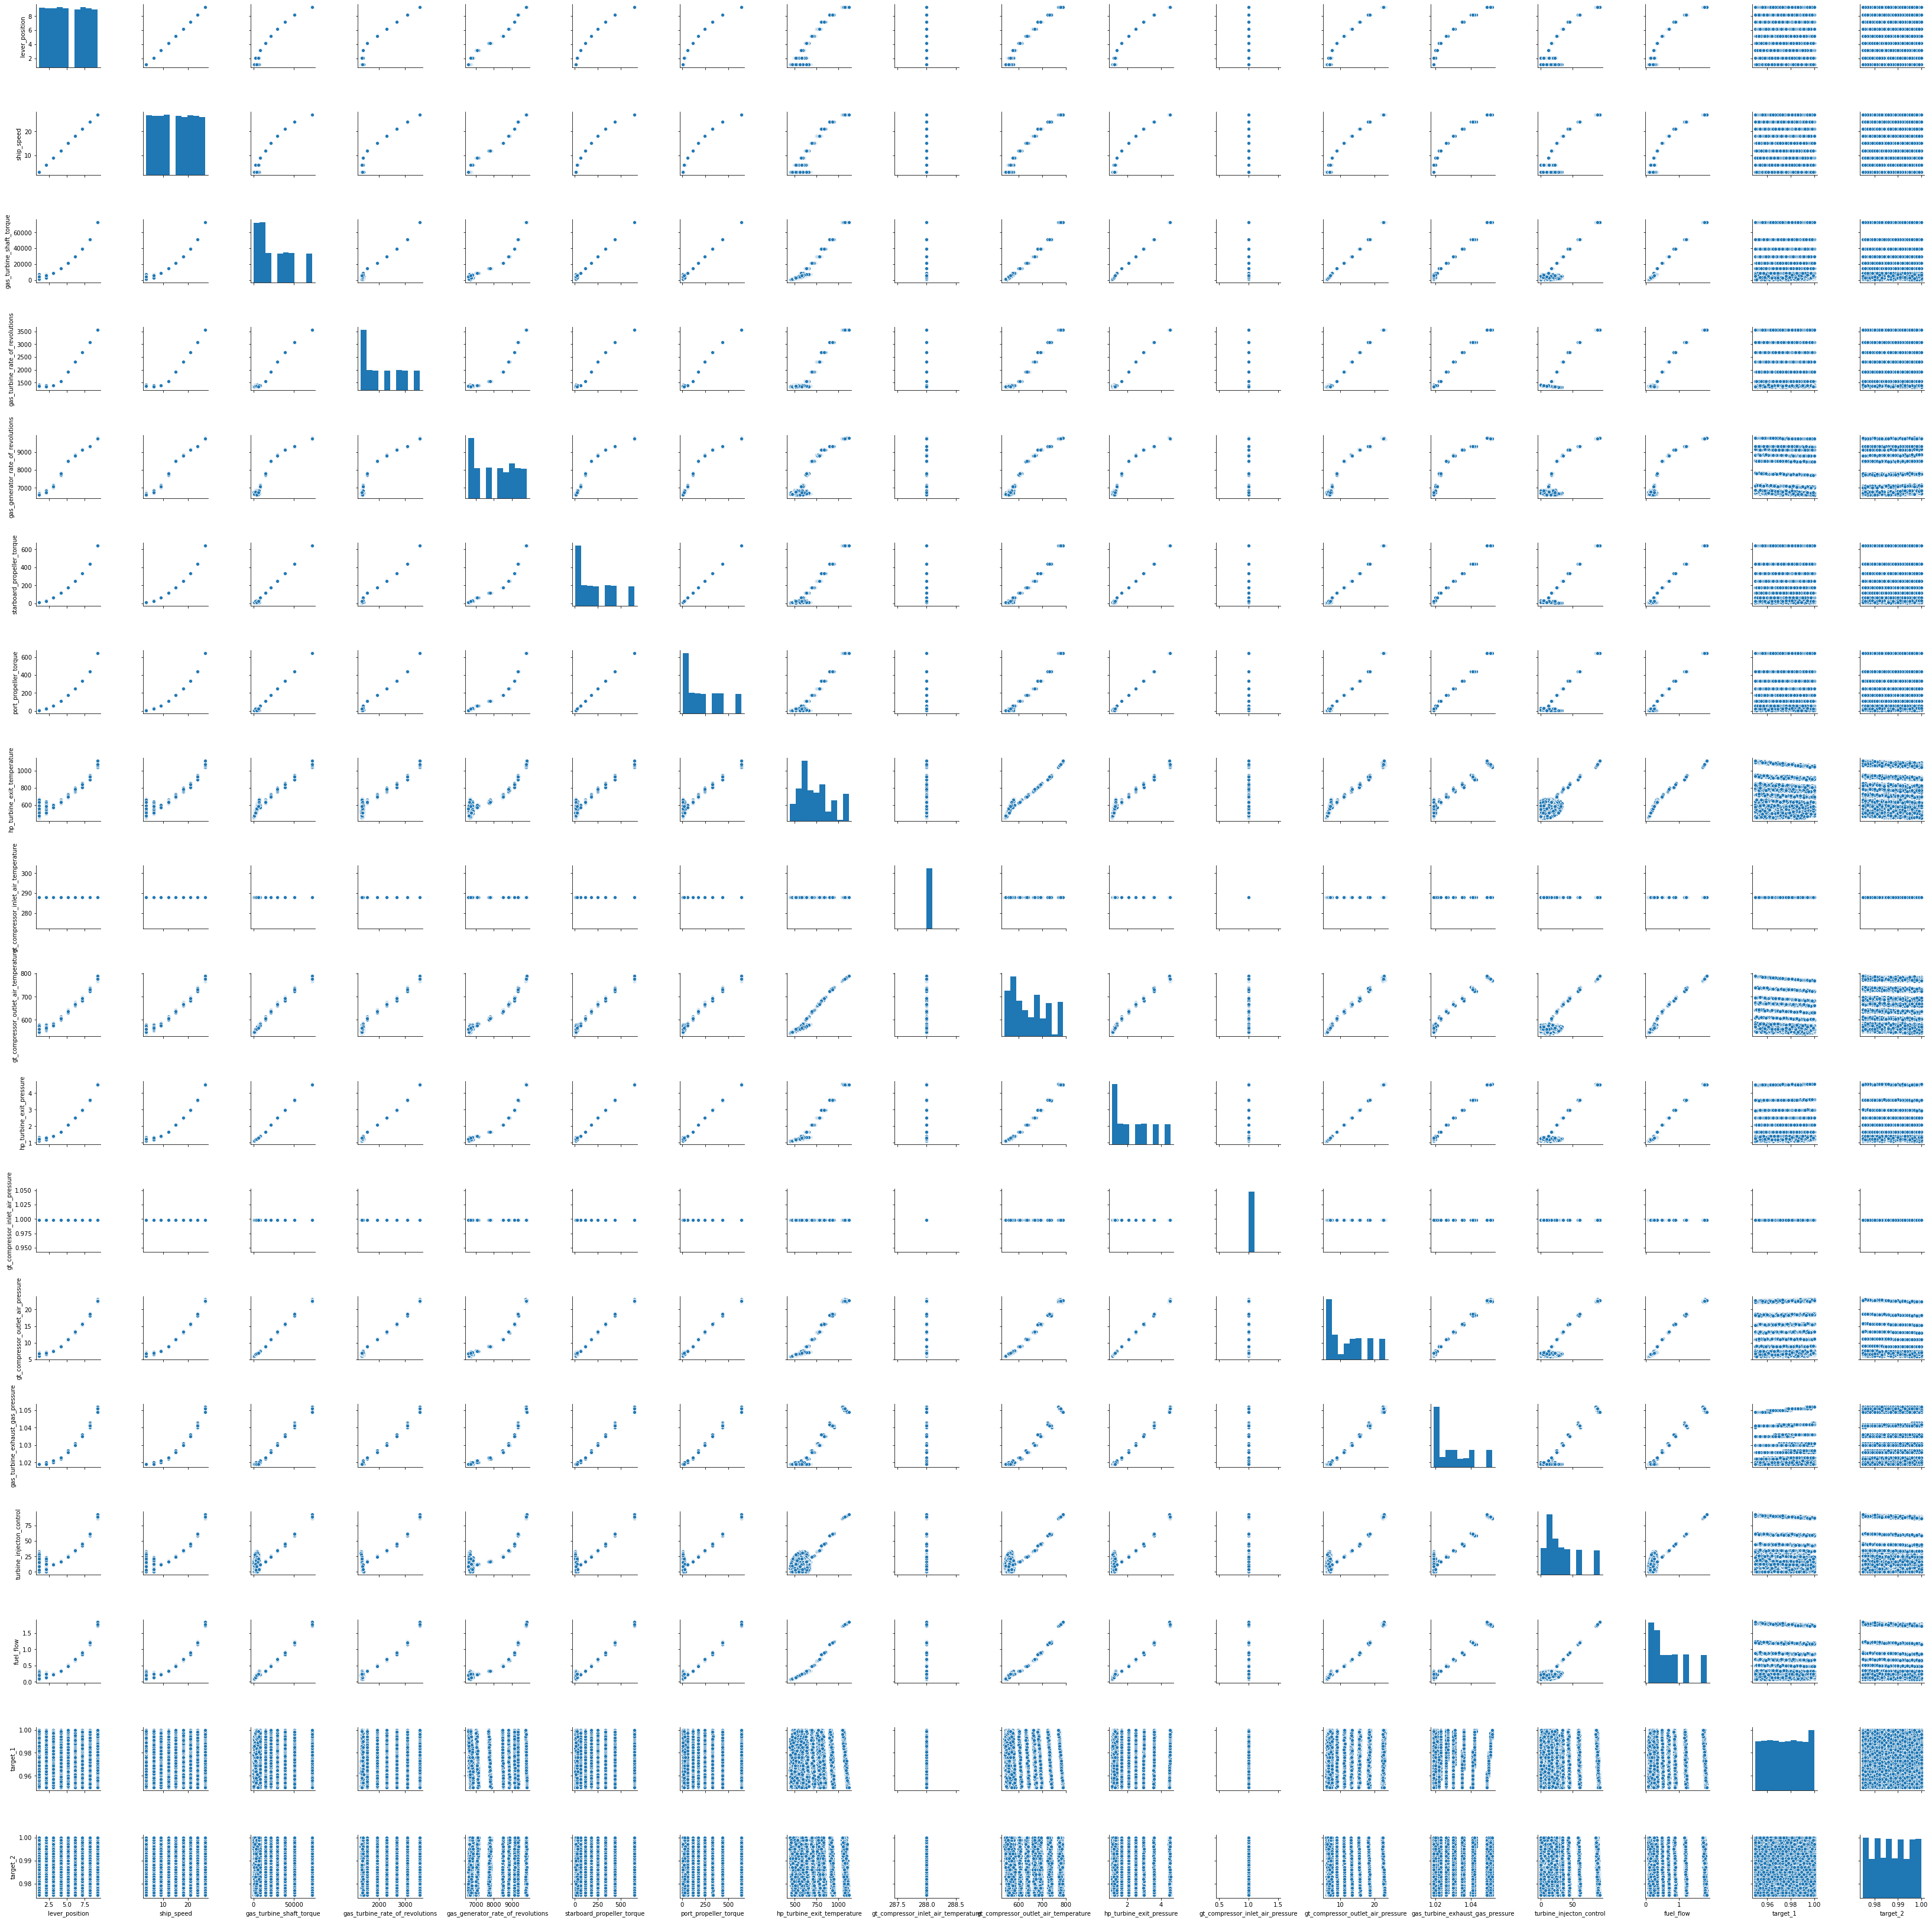

In [12]:
# visualize the relationship between two variable

sns.pairplot(propulsion_df)

Observation:
- we can notice that most of the independent variable have linear relationship which is not good for any regressoin model
- There is no linear relationship betweeb two target variable which is good
- **There is no linear relationship between any dependent and independent variabe, hence if fail to address on of the main assumption of regression models** 

In [13]:
# check if there is any discreat variable

discrete_cols = [cols for cols in propulsion_df[propulsion_df.columns] if len(propulsion_df[cols].unique()) < 25]

print('The number of discrete valye is:', len(discrete_cols), '\n', discrete_cols)

The number of discrete valye is: 5 
 ['lever_position', 'ship_speed', 'gt_compressor_inlet_air_temperature', 'gt_compressor_inlet_air_pressure', 'gas_turbine_exhaust_gas_pressure']


In [14]:
def scatter_plot(col, target):
    for cols in col:
        sns.scatterplot(y=cols, x=target, data=propulsion_df)
        plt.show()

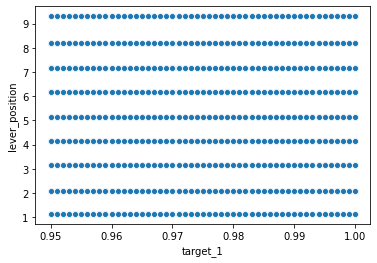

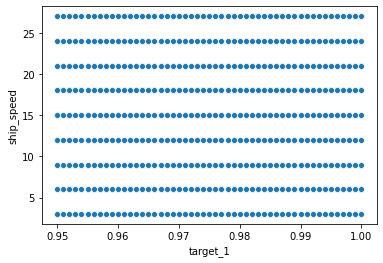

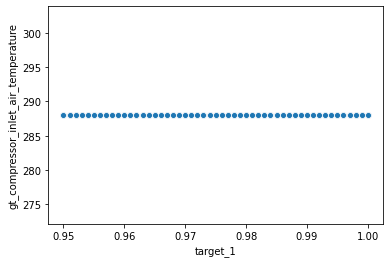

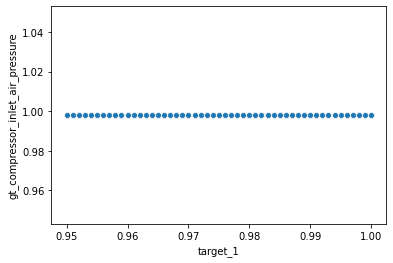

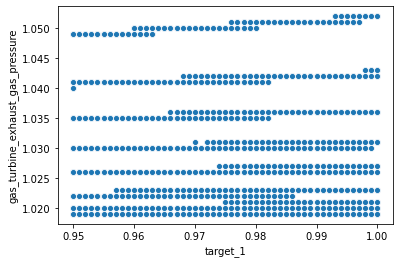

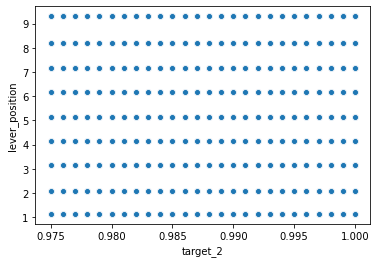

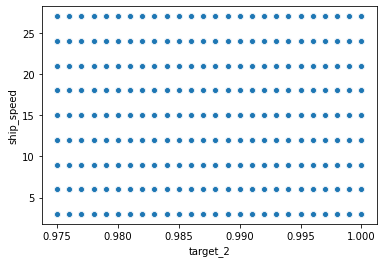

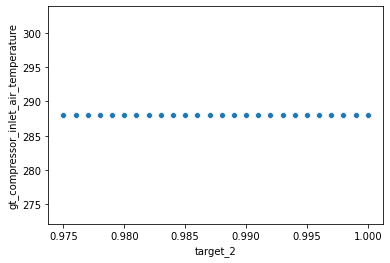

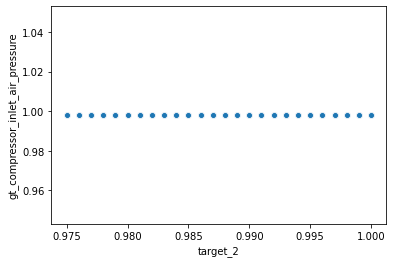

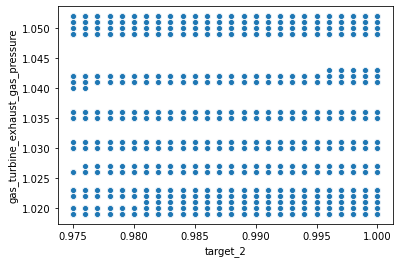

In [15]:
scatter_plot(discrete_cols, 'target_1')
scatter_plot(discrete_cols, 'target_2')

Observation:
- There is no relationship between both the target variable and the discreat variable

In [16]:
# check if there is any continouse variable

continuous_cols = [cols for cols in propulsion_df[propulsion_df.columns] if cols not in discrete_cols and cols != 'target_1' and cols != 'target_2']

print('The number of numeric columns are:', len(continuous_cols), '\n',continuous_cols)

The number of numeric columns are: 11 
 ['gas_turbine_shaft_torque', 'gas_turbine_rate_of_revolutions', 'gas_generator_rate_of_revolutions', 'starboard_propeller_torque', 'port_propeller_torque', 'hp_turbine_exit_temperature', 'gt_compressor_outlet_air_temperature', 'hp_turbine_exit_pressure', 'gt_compressor_outlet_air_pressure', 'turbine_injecton_control', 'fuel_flow']


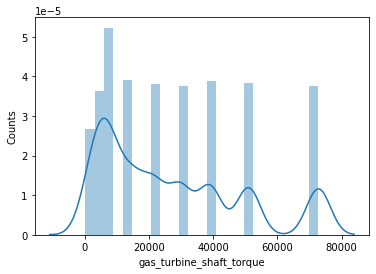

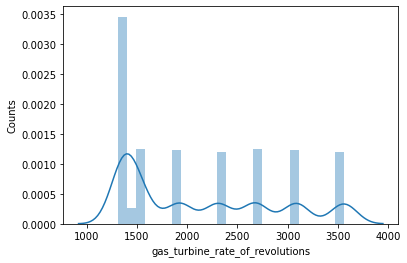

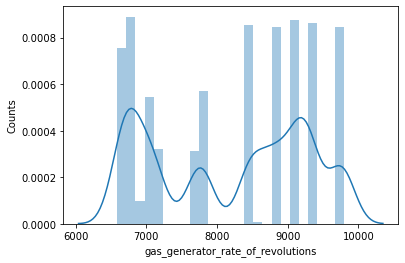

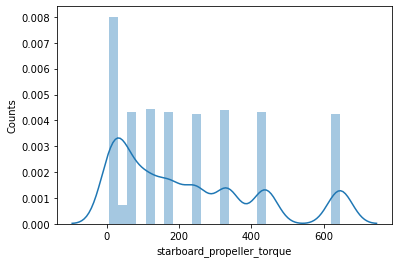

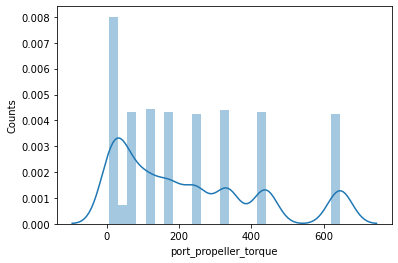

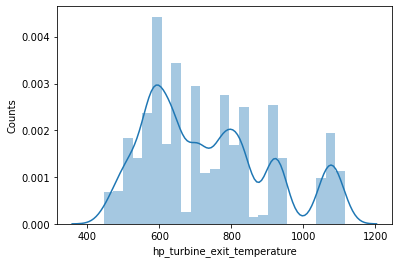

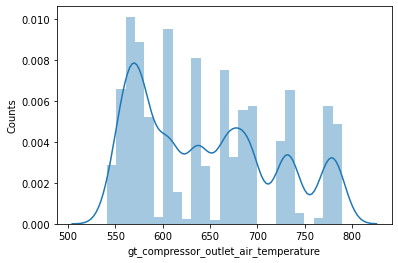

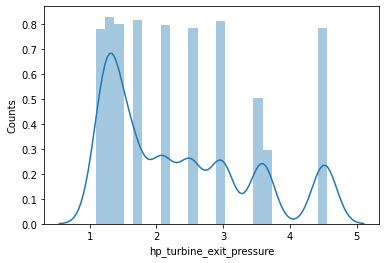

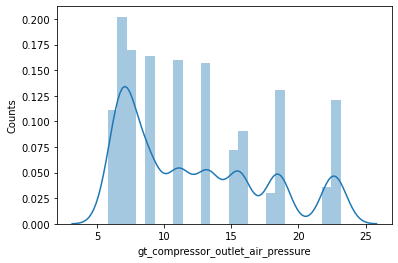

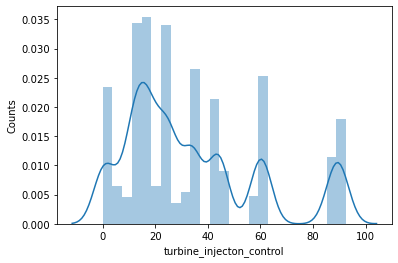

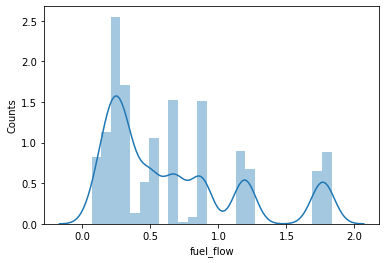

In [17]:
# Lets analyse the continuous values by creating histograms to understand the distribution

for cols in continuous_cols:
    sns.distplot(propulsion_df[cols], bins=25)
    plt.xlabel(cols)
    plt.ylabel('Counts')
    plt.show()

Observation:
-  Data is not normally distributed, we need to transform the data for to convert it into normal distribution

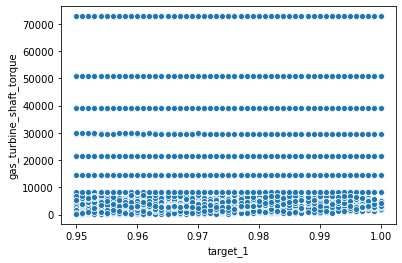

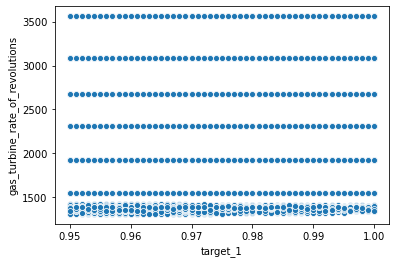

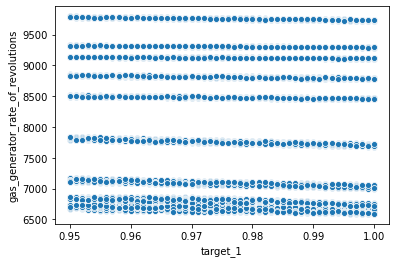

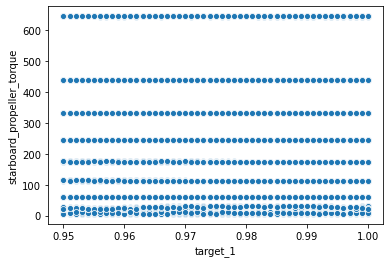

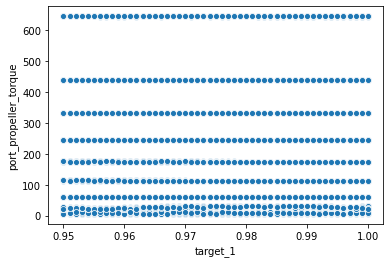

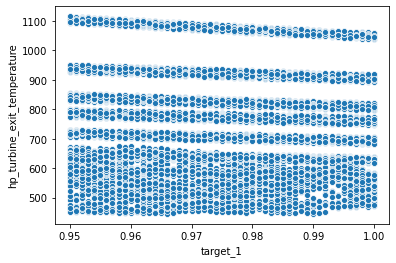

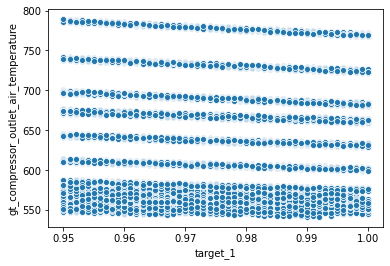

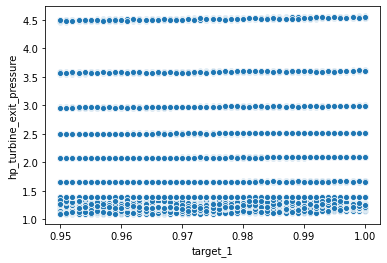

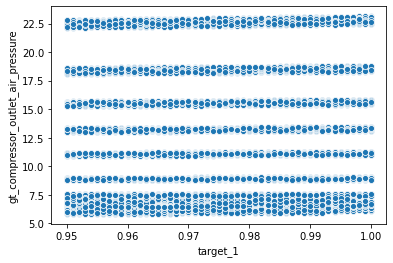

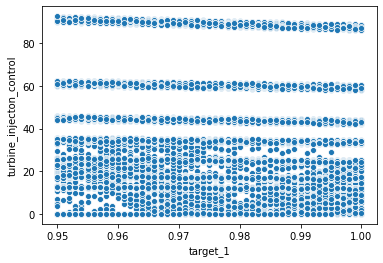

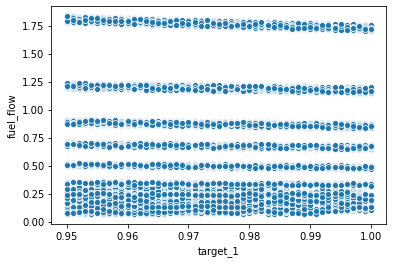

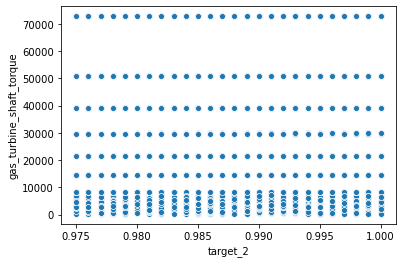

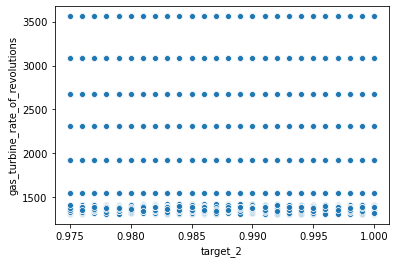

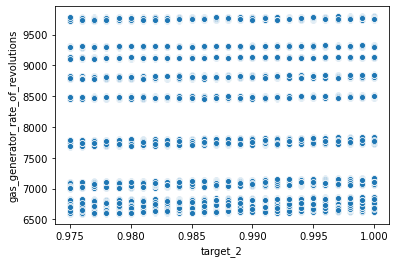

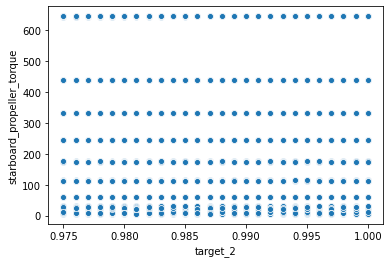

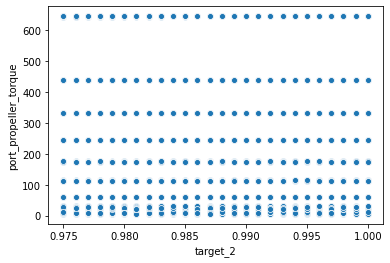

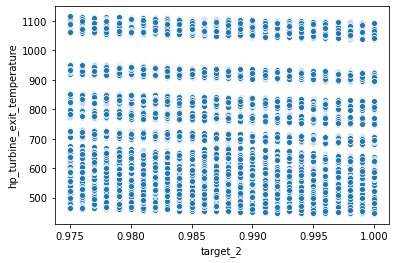

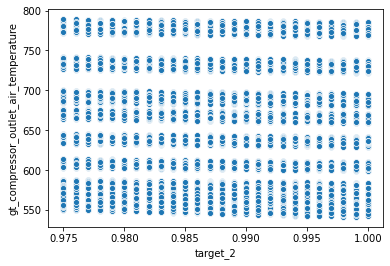

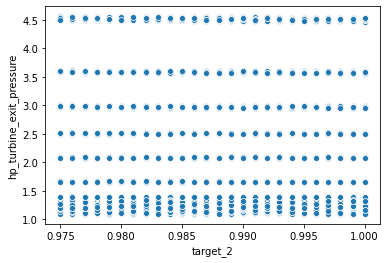

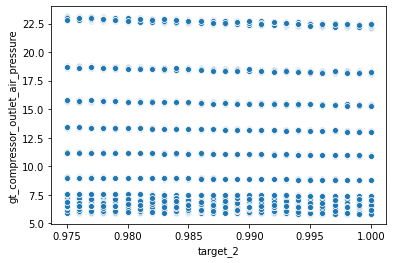

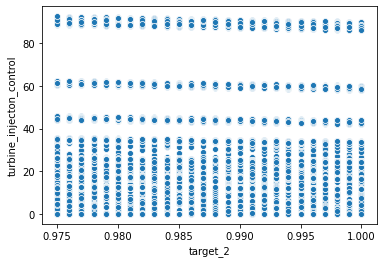

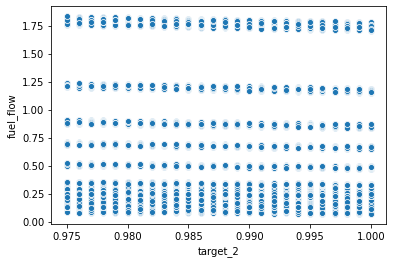

In [18]:
# We will check if there is a relation between continouse variable and target variable

scatter_plot(continuous_cols, 'target_1')
scatter_plot(continuous_cols, 'target_2')

Observation:
- There is no linear relationship between dependent and independent variable 

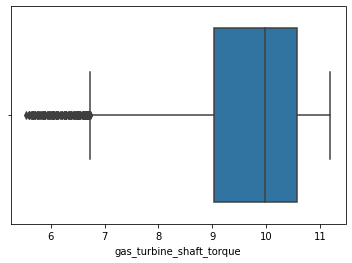

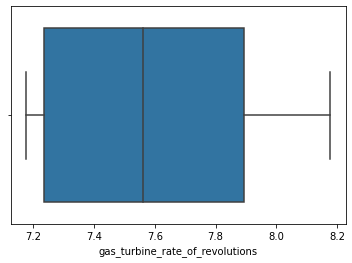

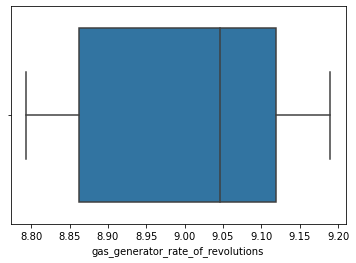

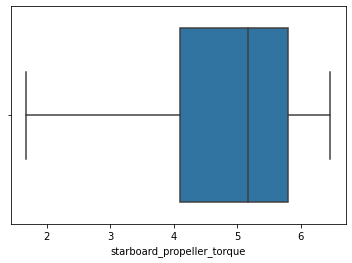

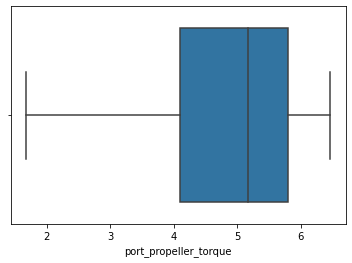

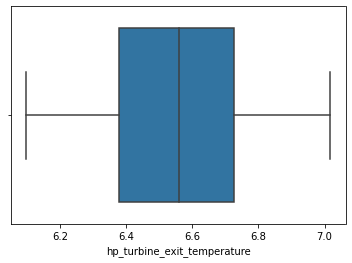

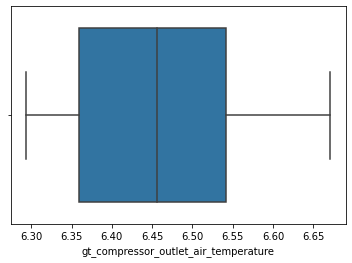

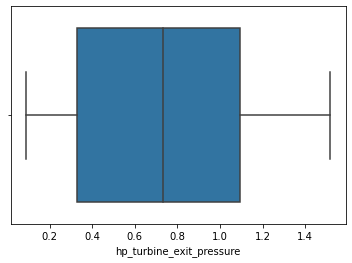

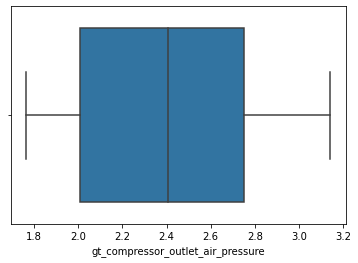

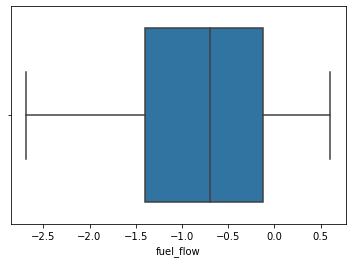

In [19]:
# vislualize the outliers

for cols in continuous_cols:
    propulsion_df_copy = propulsion_df.copy(deep=True)
    
    if 0 in propulsion_df_copy[cols].unique():
        pass
    else:
        propulsion_df_copy[cols]= np.log(propulsion_df_copy[cols])
        sns.boxplot(propulsion_df_copy[cols])
        plt.show()

Observatoin:
- There is an outlier in gas_turbin_shaf_torque

In [20]:
q1 = propulsion_df.quantile(0.25)
q3 = propulsion_df.quantile(0.75)

# calculate IQR
IQR = q3 - q1

print(IQR)

lever_position                              4.00400
ship_speed                                 12.00000
gas_turbine_shaft_torque                30624.91875
gas_turbine_rate_of_revolutions          1291.32000
gas_generator_rate_of_revolutions        2075.61200
starboard_propeller_torque                272.04300
port_propeller_torque                     272.04300
hp_turbine_exit_temperature               243.31375
gt_compressor_inlet_air_temperature         0.00000
gt_compressor_outlet_air_temperature      115.67600
hp_turbine_exit_pressure                    1.59200
gt_compressor_inlet_air_pressure            0.00000
gt_compressor_outlet_air_pressure           8.20400
gas_turbine_exhaust_gas_pressure            0.01600
turbine_injecton_control                   30.96600
fuel_flow                                   0.63500
target_1                                    0.02600
target_2                                    0.01300
dtype: float64


In [21]:
# find the outliers

iqr_outlier = (propulsion_df <  (q1 - 1.5 * IQR)) | (propulsion_df > (q3 + 1.5 * IQR))

print(iqr_outlier)

      lever_position  ship_speed  gas_turbine_shaft_torque  \
0              False       False                     False   
1              False       False                     False   
2              False       False                     False   
3              False       False                     False   
4              False       False                     False   
...              ...         ...                       ...   
9995           False       False                     False   
9996           False       False                     False   
9997           False       False                     False   
9998           False       False                     False   
9999           False       False                     False   

      gas_turbine_rate_of_revolutions  gas_generator_rate_of_revolutions  \
0                               False                              False   
1                               False                              False   
2                          

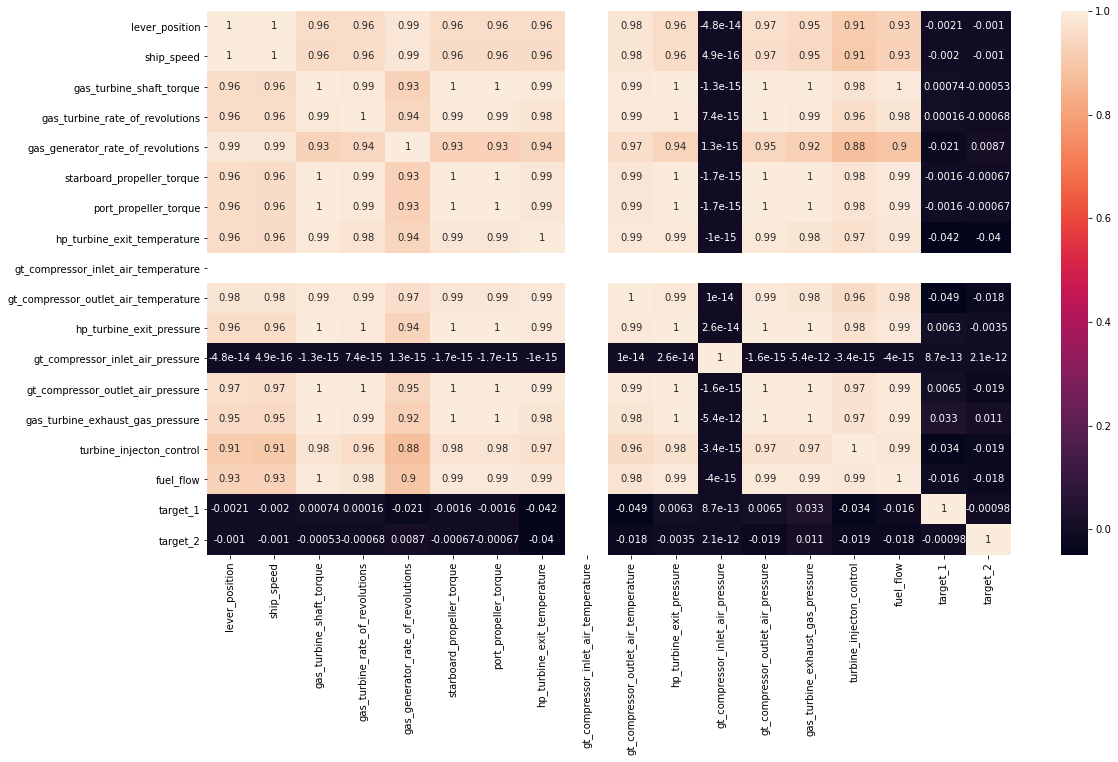

In [24]:
# visualize corellation matrix

plt.figure(figsize=(18,10))
sns.heatmap(propulsion_df.corr(), annot=True)

Observation:
- There is a linear relationship between most the indepedendent variable (which is very bad)

## Remove Outlier

In [25]:
# remove outlier

new_df = propulsion_df[~((propulsion_df < (q1 - 1.5 * IQR)) | (propulsion_df > (q3 + 1.5 * IQR))).any(axis=1)]

In [26]:
print('After removing outliers: ',new_df.shape)
print('With outliers: ', propulsion_df.shape)

After removing outliers:  (9854, 18)
With outliers:  (10000, 18)


## Dependent and indpendent variable

In [27]:
x = new_df.drop(['target_1', 'target_2'], axis=1)
y1 = new_df['target_1']
y2 = new_df['target_2']

## Train test split

In [28]:
#split for training set and testint seet for dependent and target variable

x_train, x_test, y1_train, y1_test, y2_train, y2_test = train_test_split(x, y1, y2, test_size = 0.2, random_state = 0)

x_train.shape, x_test.shape, y1_train.shape, y1_test.shape, y2_train.shape, y2_test.shape

((7883, 16), (1971, 16), (7883,), (1971,), (7883,), (1971,))

## Feature selection
We will use Recursive feature elimmination technique

In [29]:
# use any other model you want here.
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV

In [30]:
def feature_selection(x_train, y_train):
    rfe_model = RandomForestRegressor(n_estimators=200)
    
    # build the RFE with CV option.
    rfe = RFECV(rfe_model, min_features_to_select = 8, step = 1)
    
    # fit the RFE to our data.
    selection  = rfe.fit(x_train, y_train)
    
    # print the selected features.
    return x_train.columns[selection.support_]

In [31]:
sf_y1 = feature_selection(x_train, y1_train)
sf_y2 = feature_selection(x_train, y2_train)

## Modeling

In [32]:
def evaluation(x_true, y_predict):
    mse = mean_squared_error(x_true, y_predict)
    rmse = np.sqrt(mse)
    r_square = r2_score(x_true, y_predict)
    return mse, rmse, r_square

In [33]:
def train_model(x_train, y_train, x_test, y_test):
    
    eval_scores = []
    models = []
    models.append(('lr',LinearRegression()))
    models.append(('lasso',Lasso()))
    models.append(('rfr', RandomForestRegressor()))
    models.append(('etr',ExtraTreesRegressor()))
    models.append(('dtr',DecisionTreeRegressor()))
    models.append(('svr', SVR()))
    models.append(('knnr',KNeighborsRegressor()))
    
    for name, model in models:
        # Fit the model
        model.fit(x_train, y_train)

        # make prediction with test data
        y_predict = model.predict(x_test)

        eval_scores.append((name,evaluation(y_test, y_predict)))   
        
    return eval_scores

In [34]:
def print_score(model):
    for score in model:
        print(score[0])
        print('Mean square error : ', score[1][0])
        print('Root Mean square error : ', score[1][1])
        print('R squared :', score[1][2])
        print('-'* 20)

In [35]:
# print model score for target_1

print_score(train_model(x_train, y1_train, x_test, y1_test))

lr
Mean square error :  3.297376886012223e-05
Root Mean square error :  0.005742279064981275
R squared : 0.8459526227016849
--------------------
lasso
Mean square error :  0.00021379317721329424
Root Mean square error :  0.014621668072189788
R squared : 0.001197637622434633
--------------------
rfr
Mean square error :  1.0163052765093603e-06
Root Mean square error :  0.0010081196737041491
R squared : 0.9952520088605933
--------------------
etr
Mean square error :  4.5694759005577994e-07
Root Mean square error :  0.0006759789864010418
R squared : 0.9978652249880963
--------------------
dtr
Mean square error :  2.8138001014713297e-06
Root Mean square error :  0.0016774385537095926
R squared : 0.9868544439759931
--------------------
svr
Mean square error :  0.00021425114155251154
Root Mean square error :  0.014637320162943473
R squared : -0.0009418874543574152
--------------------
knnr
Mean square error :  1.3219989852866562e-05
Root Mean square error :  0.00363593039714274
R squared : 0.

In [36]:
# print model score for target_2

print_score(train_model(x_train, y1_train, x_test, y2_test))

lr
Mean square error :  0.00037637958577828453
Root Mean square error :  0.019400504781532994
R squared : -5.709661150383955
--------------------
lasso
Mean square error :  0.00020966997117173562
Root Mean square error :  0.014479985192386614
R squared : -2.7377544190237675
--------------------
rfr
Mean square error :  0.0004184489459157893
Root Mean square error :  0.020456024685060126
R squared : -6.459625181383249
--------------------
etr
Mean square error :  0.0004198601691019894
Root Mean square error :  0.020490489723332367
R squared : -6.484782840684531
--------------------
dtr
Mean square error :  0.0004193764586504319
Root Mean square error :  0.020478683030176328
R squared : -6.476159808651221
--------------------
svr
Mean square error :  0.00021670674784373236
Root Mean square error :  0.014720962870808837
R squared : -2.863197957525979
--------------------
knnr
Mean square error :  0.00040669903602232407
Root Mean square error :  0.020166780507119227
R squared : -6.25016133

## deep learing model

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, Dropout

In [43]:
def deep_model(x_train, y_train, x_test, y_test):
    # create model
    model = Sequential([
        Dense(units=25, input_dim=x.shape[1], kernel_initializer = 'he_uniform' , activation='relu'),
        Dropout(0.3),
        Dense(4, kernel_initializer ='he_uniform', activation='relu'),
        Dropout(0.3),
        Dense(2, kernel_initializer ='he_uniform', activation='relu'),
        Dense(1, kernel_initializer = 'glorot_uniform') ,  
    ])
    
    # Compiling the network
    model.compile(optimizer = 'adam', loss='mean_absolute_error')
    
    # Fitting the Training set
    hist = model.fit(x_train, y_train, epochs=100, verbose=1)
    
    # Make Predict
    pred = model.predict(x_test)
    
    # Calcaulte RMSE error
    score = evaluation(pred,y_test)
    
    # save model
    model.save('propulsion.h5')
    
    return score

In [44]:
score1 = deep_model(x_train, y1_train, x_test, y1_test)
print('Score for "GT Compressor decay state coefficient"')
print('Mean square error : ', score1[0])
print('Root Mean square error : ', score1[1])
print('R squared :', score1[2])

Epoch 1/100
247/247 [==============================] - 0s 1ms/step - loss: 198.2299
Epoch 2/100
247/247 [==============================] - 0s 1ms/step - loss: 10.9358
Epoch 3/100
247/247 [==============================] - 0s 1ms/step - loss: 4.7306
Epoch 4/100
247/247 [==============================] - 0s 1ms/step - loss: 2.8410
Epoch 5/100
247/247 [==============================] - 0s 1ms/step - loss: 1.4956
Epoch 6/100
247/247 [==============================] - 0s 1ms/step - loss: 0.8665
Epoch 7/100
247/247 [==============================] - 0s 1ms/step - loss: 1.7155
Epoch 8/100
247/247 [==============================] - 0s 1ms/step - loss: 0.6119
Epoch 9/100
247/247 [==============================] - 0s 2ms/step - loss: 1.1834
Epoch 10/100
247/247 [==============================] - 0s 1ms/step - loss: 0.4231
Epoch 11/100
247/247 [==============================] - 0s 2ms/step - loss: 0.4498
Epoch 12/100
247/247 [==============================] - 0s 1ms/step - loss: 0.4862
Epoch 13/1

In [40]:
score2 = deep_model(x_train, y1_train, x_test, y2_test)
print('Score for "GT Turbine decay state coefficient minimizing"')
print('Mean square error : ', score2[0])
print('Root Mean square error : ', score2[1])
print('R squared :', score2[2])

Epoch 1/100
247/247 [==============================] - 1s 3ms/step - loss: 1203.8772
Epoch 2/100
247/247 [==============================] - 1s 3ms/step - loss: 46.2466
Epoch 3/100
247/247 [==============================] - 1s 2ms/step - loss: 12.0003
Epoch 4/100
247/247 [==============================] - 1s 2ms/step - loss: 4.7849
Epoch 5/100
247/247 [==============================] - 1s 2ms/step - loss: 2.2173A: 0s - loss
Epoch 6/100
247/247 [==============================] - 0s 2ms/step - loss: 1.2442
Epoch 7/100
247/247 [==============================] - 1s 2ms/step - loss: 1.5577
Epoch 8/100
247/247 [==============================] - 1s 2ms/step - loss: 2.1028
Epoch 9/100
247/247 [==============================] - 1s 2ms/step - loss: 0.8005
Epoch 10/100
247/247 [==============================] - 1s 2ms/step - loss: 0.1779
Epoch 11/100
247/247 [==============================] - 1s 3ms/step - loss: 0.7941
Epoch 12/100
247/247 [==============================] - 1s 2ms/step - loss: 0.1

### There is no linear relationship between any of the independent variable and depenendent, hence the model have perform very poorely

## Load Save model

In [ ]:
model = load_model('propulsion_model.h5')

In [ ]:
model.evaluate(x_train, y1_train)